***Import Libraries***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

***Load Data***

In [2]:
health_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
health_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


***Data Analysis***

In [3]:
health_df.shape

(5110, 12)

In [4]:
health_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


***Duplicate Record***

In [6]:
health_df[health_df.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


***Missing Values/Null Values***

In [7]:
health_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: ylabel='Density'>

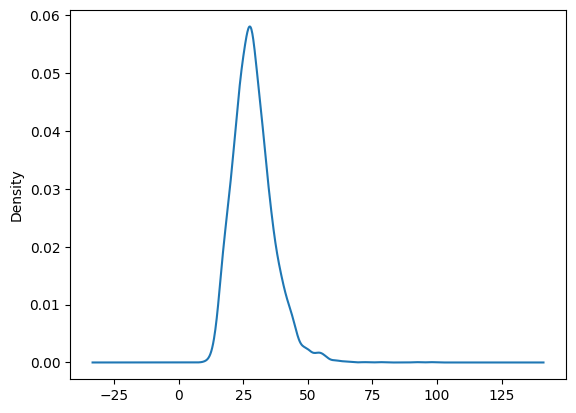

In [8]:
health_df['bmi'].plot(kind = 'kde')

<Axes: >

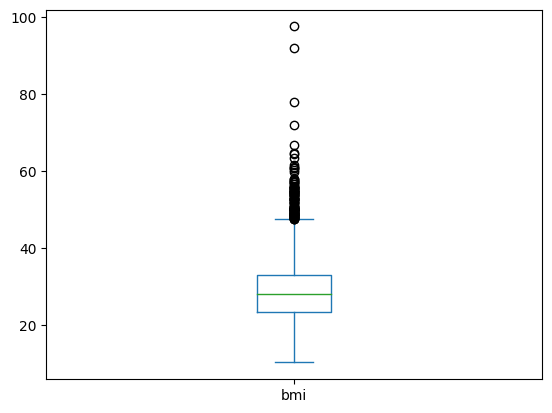

In [9]:
health_df['bmi'].plot(kind = 'box')

In [10]:
health_df['bmi'].mean()

28.893236911794666

***Filling Missing Value***

In [11]:
health_df['bmi'] = health_df['bmi'].fillna(health_df['bmi'].mean())

In [12]:
health_df.shape

(5110, 12)

In [13]:
health_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Basic Statistics**

In [14]:
health_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


***Converting Stroke column to categories YES & NO***

In [15]:
health_df['stroke'] = health_df['stroke'].apply(lambda x : 'YES' if x == 1 else 'NO')

In [16]:
health_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,YES
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,YES
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,YES
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,YES
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,YES


***List Numeric Columns***

In [17]:
Numeric_columns = health_df.select_dtypes(include=np.number).columns
Numeric_columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')

***LIst Categorical Columns***

In [18]:
Cat_columns = health_df.select_dtypes(exclude=np.number).columns
Cat_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'stroke'],
      dtype='object')

***Visualize Numeric Variable - Box plot***

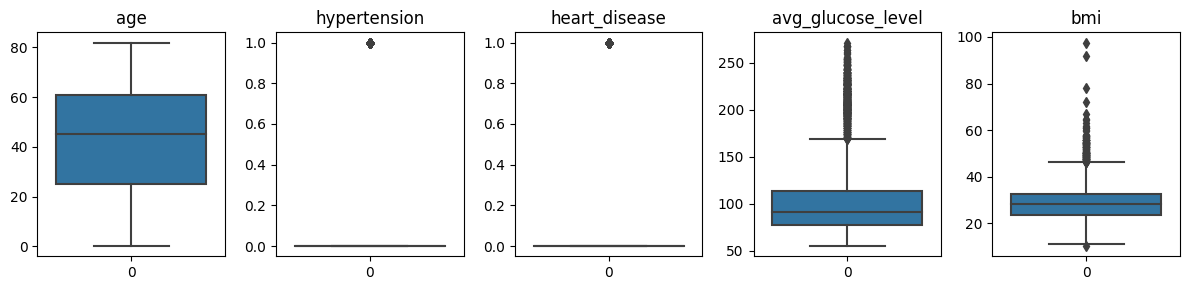

In [19]:
fig, axes = plt.subplots(ncols=5, figsize=(12,3))
for column, axis in zip(Numeric_columns[1:6], axes):
    sns.boxplot(data=health_df[column], ax = axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

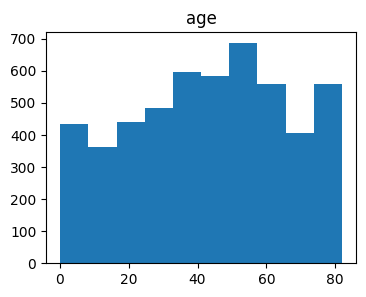

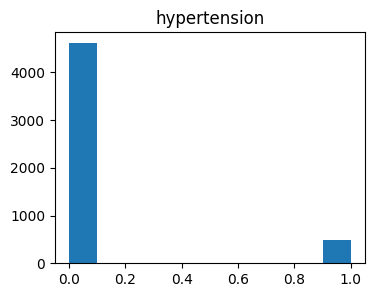

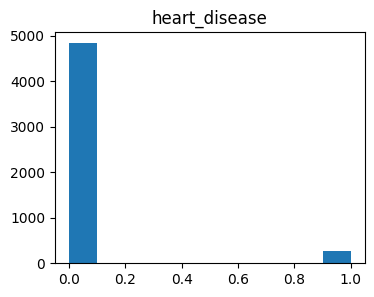

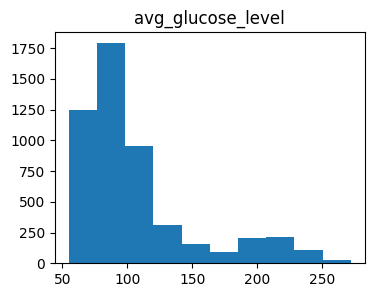

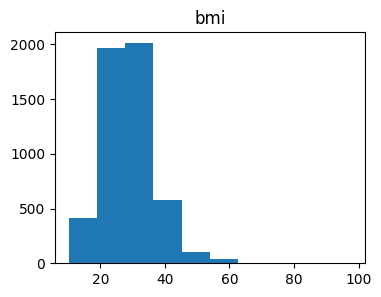

In [20]:
for col in Numeric_columns[1:6]:
    plt.figure(figsize=(4,3))
    plt.hist(health_df[col])
    plt.title(col)
    plt.show()

***Correlation Matrix***

In [21]:
corr_matrix = health_df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']].corr()
corr_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi
age,1.000000,0.276398,0.263796,0.238171,0.325942
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751
bmi,0.325942,0.160189,0.038899,0.168751,1.000000


<Axes: >

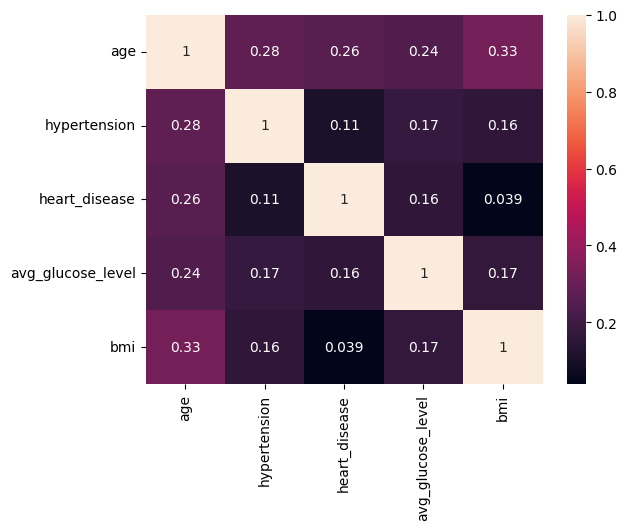

In [22]:
sns.heatmap(corr_matrix, annot = True)

In [23]:
Cat_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'stroke'],
      dtype='object')

In [24]:
health_df['stroke'].value_counts()

stroke
NO     4861
YES     249
Name: count, dtype: int64

<Axes: xlabel='stroke'>

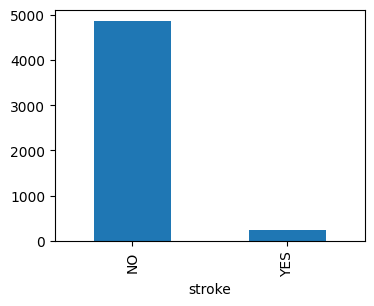

In [25]:
plt.figure(figsize = (4,3))
health_df['stroke'].value_counts().plot(kind = 'bar')

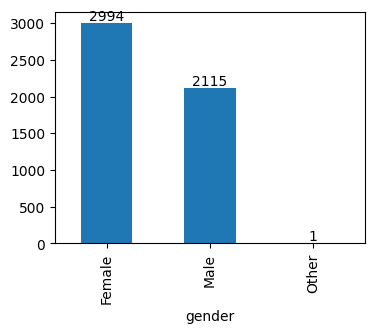

In [26]:
plt.figure(figsize=(4,3))
ax = health_df['gender'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

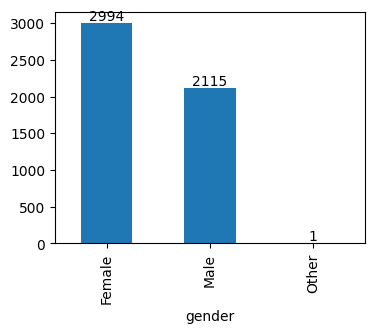

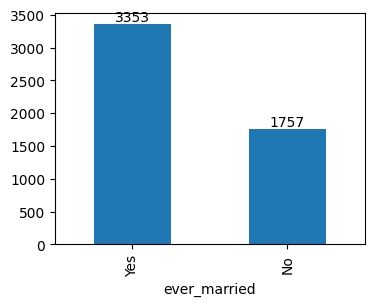

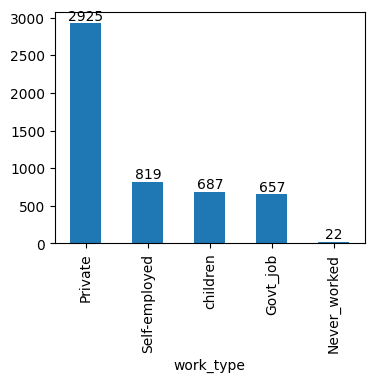

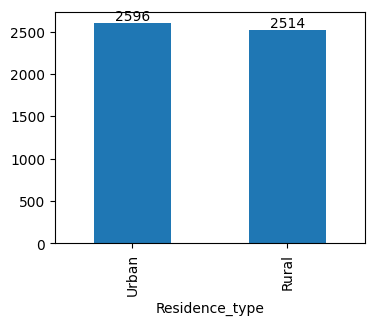

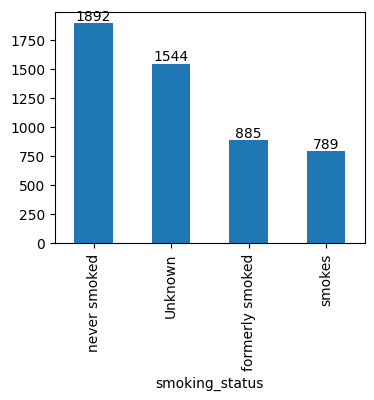

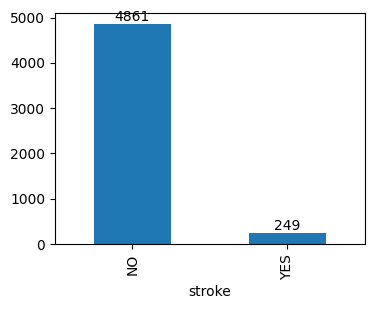

In [27]:
for col in Cat_columns:
    plt.figure(figsize=(4,3))
    ax = health_df[col].value_counts().plot(kind='bar')
    for i in ax.containers:
        ax.bar_label(i)
    plt.show()

***Max and Min age Patients Parameters***

In [28]:
max_age = health_df['age'].max()
max_age

82.0

In [29]:
health_df[health_df['age'] == max_age]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.500000,Unknown,YES
32,39373,Female,82.0,1,0,Yes,Self-employed,Urban,196.92,22.200000,never smoked,YES
35,712,Female,82.0,1,1,No,Private,Rural,84.03,26.500000,formerly smoked,YES
42,61960,Male,82.0,0,1,Yes,Private,Urban,144.90,26.400000,smokes,YES
56,38829,Female,82.0,0,0,Yes,Private,Rural,59.32,33.200000,never smoked,YES
128,37132,Male,82.0,0,0,Yes,Govt_job,Urban,200.59,29.000000,formerly smoked,YES
140,20439,Male,82.0,0,1,Yes,Govt_job,Rural,103.68,25.000000,never smoked,YES
187,67895,Female,82.0,1,1,Yes,Govt_job,Urban,215.94,27.900000,formerly smoked,YES
188,30184,Male,82.0,0,0,Yes,Private,Rural,86.62,29.500000,formerly smoked,YES
337,56357,Female,82.0,0,1,No,Private,Urban,215.60,24.900000,never smoked,NO


In [30]:
min_age = health_df['age'].min()
min_age

0.08

In [31]:
health_df[health_df['age'] == min_age]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,NO
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,NO


***Derived Column-Age Group***

In [32]:
def Get_Age_Group(age):
    if age <= 20:
        return "< 20"
    if age > 20 and age <= 30:
        return "21-30"
    if age > 30 and age <= 40:
        return "31-40"
    if age > 40 and age <= 50:
        return "41-50"
    if age > 50 and age <= 60:
        return "51-60"
    if age > 60 and age <= 70:
        return "61-70"
    if age > 70 and age <= 80:
        return "71-80"
    else :
        return "> 80"

In [33]:
health_df['Age_group'] = health_df['age'].apply(lambda x : Get_Age_Group(x))

In [34]:
health_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,YES,61-70
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,YES,61-70
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,YES,71-80
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,YES,41-50
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,YES,71-80


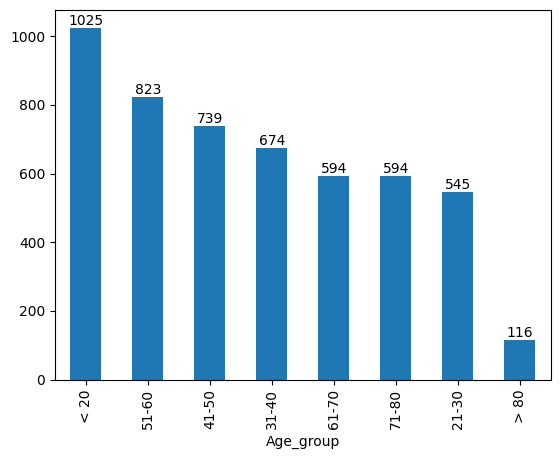

In [35]:
ax = health_df['Age_group'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

***Analyze the data according to Age_group***

In [36]:
health_df.groupby(['Age_group'])['stroke'].sum()

Age_group
21-30    NONONONONONONONONONONONONONONONONONONONONONONO...
31-40    YESYESYESYESYESYESNONONONONONONONONONONONONONO...
41-50    YESYESYESYESYESYESYESYESYESYESYESYESYESYESYESN...
51-60    YESYESYESYESYESYESYESYESYESYESYESYESYESYESYESY...
61-70    YESYESYESYESYESYESYESYESYESYESYESYESYESYESYESY...
71-80    YESYESYESYESYESYESYESYESYESYESYESYESYESYESYESY...
< 20     YESYESNONONONONONONONONONONONONONONONONONONONO...
> 80     YESYESYESYESYESYESYESYESYESYESYESYESYESYESYESY...
Name: stroke, dtype: object

***"Age_group" with respect to avg values "bmi", "avg_glucose_level"."age"***

In [37]:
health_df.groupby(['Age_group'])[['bmi','avg_glucose_level','age']].mean().reset_index()

,Age_group,bmi,avg_glucose_level,age
0,21-30,28.529613,94.096165,25.563303
1,31-40,31.133567,98.938190,35.538576
2,41-50,31.345392,101.011164,45.569689
3,51-60,31.776416,114.155310,55.340219
4,61-70,30.852520,119.687222,65.021886
5,71-80,29.117208,124.099108,76.042088
6,< 20,22.366762,94.345210,10.280976
7,> 80,27.996493,123.602500,81.482759


***"ever married" with respect to avg values "bmi","avg_glucose_level","age"***

In [38]:
health_df.groupby(['ever_married'])[['bmi','avg_glucose_level','age']].mean().reset_index()

,ever_married,bmi,avg_glucose_level,age
0,No,25.323590,96.44815,22.014229
1,Yes,30.763761,111.23031,54.342082


***"work_type" with respect to avg values "bmi","avg_glucose_level","age"***

In [39]:
health_df.groupby(['work_type'])[['bmi','avg_glucose_level','age']].mean().reset_index()

,work_type,bmi,avg_glucose_level,age
0,Govt_job,30.455125,107.779772,50.879756
1,Never_worked,25.545455,96.042727,16.181818
2,Private,30.249617,106.796844,45.503932
3,Self-employed,30.141029,112.645446,60.201465
4,children,20.244238,94.400277,6.841339


***"Residence_type" with respect to avg values "bmi","avg_glucose_level","age"***

In [40]:
health_df.groupby(['Residence_type'])[['bmi','avg_glucose_level','age']].mean().reset_index()

,Residence_type,bmi,avg_glucose_level,age
0,Rural,28.894176,106.375235,42.900811
1,Urban,28.892328,105.927307,43.542126


***"smoking_status" with respect to avg values "bmi","avg_glucose_level","age"***

In [41]:
health_df.groupby(['smoking_status'])[['bmi','avg_glucose_level','age']].mean().reset_index()

,smoking_status,bmi,avg_glucose_level,age
0,Unknown,25.793839,99.601541,30.229922
1,formerly smoked,30.646639,112.886079,54.929944
2,never smoked,29.959529,107.558092,46.744715
3,smokes,30.434789,108.017440,47.096324


**'stroke' with respect to avg values 'bmi','avg_glucose_level','age'**

In [42]:
health_df.groupby(['stroke'])[['bmi','avg_glucose_level','age']].mean().reset_index()

,stroke,bmi,avg_glucose_level,age
0,NO,28.825388,104.795513,41.971545
1,YES,30.217789,132.544739,67.728193


***"stroke", "gender", "smoking_status", "work type" , "ever_married" with respect to "avg_glucose_level"***

In [43]:
health_df.groupby(['stroke','gender'])[['avg_glucose_level']].mean().reset_index()

,stroke,gender,avg_glucose_level
0,NO,Female,103.051753
1,NO,Male,107.255112
2,NO,Other,143.330000
3,YES,Female,124.414397
4,YES,Male,143.159352


In [44]:
health_df.groupby(['stroke','smoking_status'])[['avg_glucose_level']].mean().reset_index()

,stroke,smoking_status,avg_glucose_level
0,NO,Unknown,98.810127
1,NO,formerly smoked,111.175092
2,NO,never smoked,106.292042
3,NO,smokes,106.219906
4,YES,Unknown,124.808936
5,YES,formerly smoked,132.806857
6,YES,never smoked,132.907222
7,YES,smokes,139.987857


In [45]:
health_df.groupby(['stroke','work_type'])[['avg_glucose_level']].mean().reset_index()

,stroke,work_type,avg_glucose_level
0,NO,Govt_job,106.275881
1,NO,Never_worked,96.042727
2,NO,Private,105.113022
3,NO,Self-employed,112.020504
4,NO,children,94.488599
5,YES,Govt_job,136.216970
6,YES,Private,138.167919
7,YES,Self-employed,119.894769
8,YES,children,64.150000


In [46]:
health_df.groupby(['stroke','Residence_type'])[['avg_glucose_level']].mean().reset_index()

,stroke,Residence_type,avg_glucose_level
0,NO,Rural,105.245746
1,NO,Urban,104.356440
2,YES,Rural,130.153947
3,YES,Urban,134.563630


In [47]:
health_df.groupby(['stroke','ever_married'])[['avg_glucose_level']].mean().reset_index()

,stroke,ever_married,avg_glucose_level
0,NO,No,96.280208
1,NO,Yes,109.492113
2,YES,No,106.455172
3,YES,Yes,135.983818


***Variable correlations***

In [48]:
num_col = ['age','bmi','avg_glucose_level']
corr_matrix = health_df[num_col].corr()
corr_matrix

,age,bmi,avg_glucose_level
age,1.000000,0.325942,0.238171
bmi,0.325942,1.000000,0.168751
avg_glucose_level,0.238171,0.168751,1.000000


<Axes: >

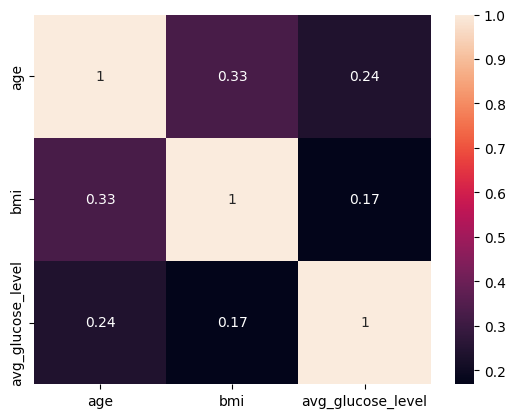

In [49]:
sns.heatmap(corr_matrix, annot = True)

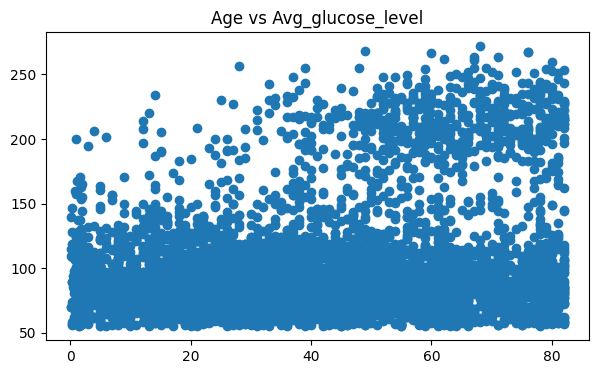

In [50]:
plt.figure(figsize=(7,4))
plt.scatter(health_df.age,health_df.avg_glucose_level)
plt.title('Age vs Avg_glucose_level')
plt.show()

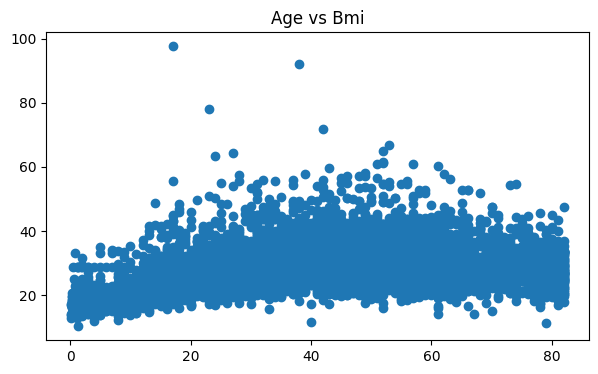

In [51]:
plt.figure(figsize=(7,4))
plt.scatter(health_df.age, health_df.bmi)
plt.title('Age vs Bmi')
plt.show()

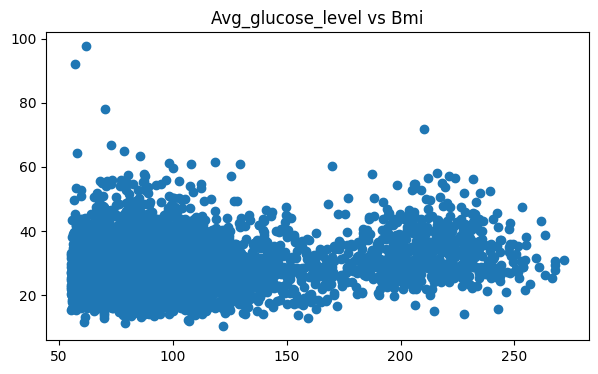

In [52]:
plt.figure(figsize=(7,4))
plt.scatter(health_df.avg_glucose_level, health_df.bmi)
plt.title('Avg_glucose_level vs Bmi')
plt.show()